In [1]:
import pandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import time
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
from sklearn import preprocessing
import tensorflow as tf
import math

Using TensorFlow backend.


In [2]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[ 22.  28.]
 [ 49.  64.]]


In [16]:
def build_model(layers):
    d = 0.3
    model = Sequential()
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))#(window,5)
    model.add(Dropout(d))
        
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(1,kernel_initializer="uniform",activation='linear'))
    
    # adam = keras.optimizers.Adam(decay=0.2)
        
    start = time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

In [28]:
df = pandas.read_csv("../nyse/prices-split-adjusted.csv",index_col = 0)
df = df[df.symbol == 'GOOG']
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df.drop(['symbol'],1,inplace=True)

In [29]:
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df['adj close'] = min_max_scaler.fit_transform(df['adj close'].values.reshape(-1,1))
    return df
df = normalize_data(df)

In [30]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns) # 5
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    train = result[:int(row), :] # 90% date, all features 
    
    x_train = train[:, :-1] 
    y_train = train[:, -1][:,-1]
    
    x_test = result[int(row):, :-1] 
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [31]:
window = 44
X_train, y_train, X_test, y_test = load_data(df, window)

In [32]:
model = build_model([5,window,1])

('Compilation Time : ', 0.026691913604736328)


In [33]:
model.fit(X_train,y_train,batch_size=512,epochs=90,validation_split=0.1,verbose=1)

Train on 1390 samples, validate on 155 samples
Epoch 1/90
1390/1390 [==============================] - 1s - loss: 0.1321 - acc: 7.1942e-04 - val_loss: 0.5366 - val_acc: 0.0000e+00
Epoch 2/90
1390/1390 [==============================] - 0s - loss: 0.0679 - acc: 7.1942e-04 - val_loss: 0.0545 - val_acc: 0.0000e+00
Epoch 3/90
1390/1390 [==============================] - 0s - loss: 0.0396 - acc: 7.1942e-04 - val_loss: 0.1721 - val_acc: 0.0000e+00
Epoch 4/90
1390/1390 [==============================] - 0s - loss: 0.0217 - acc: 7.1942e-04 - val_loss: 0.2071 - val_acc: 0.0000e+00
Epoch 5/90
1390/1390 [==============================] - 0s - loss: 0.0172 - acc: 7.1942e-04 - val_loss: 0.0835 - val_acc: 0.0000e+00
Epoch 6/90
1390/1390 [==============================] - 0s - loss: 0.0098 - acc: 7.1942e-04 - val_loss: 0.0452 - val_acc: 0.0000e+00
Epoch 7/90
1390/1390 [==============================] - 0s - loss: 0.0050 - acc: 7.1942e-04 - val_loss: 0.0795 - val_acc: 0.0000e+00
Epoch 8/90
1390/1390 [

1390/1390 [==============================] - 0s - loss: 9.0175e-04 - acc: 7.1942e-04 - val_loss: 0.0136 - val_acc: 0.0000e+00
Epoch 62/90
1390/1390 [==============================] - 0s - loss: 9.4754e-04 - acc: 7.1942e-04 - val_loss: 0.0063 - val_acc: 0.0000e+00
Epoch 63/90
1390/1390 [==============================] - 0s - loss: 9.6204e-04 - acc: 7.1942e-04 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 64/90
1390/1390 [==============================] - 0s - loss: 9.0050e-04 - acc: 7.1942e-04 - val_loss: 0.0077 - val_acc: 0.0000e+00
Epoch 65/90
1390/1390 [==============================] - 0s - loss: 8.7532e-04 - acc: 7.1942e-04 - val_loss: 0.0092 - val_acc: 0.0000e+00
Epoch 66/90
1390/1390 [==============================] - 0s - loss: 8.2460e-04 - acc: 7.1942e-04 - val_loss: 0.0102 - val_acc: 0.0000e+00
Epoch 67/90
1390/1390 [==============================] - 0s - loss: 8.4181e-04 - acc: 7.1942e-04 - val_loss: 0.0086 - val_acc: 0.0000e+00
Epoch 68/90
1390/1390 [=======================

In [13]:
model.save('models/model_google.h5')

In [34]:
p = model.predict(X_test)

In [35]:
df = pandas.read_csv("../nyse/prices-split-adjusted.csv", index_col = 0)
df = df[df.symbol == 'GOOG']
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df.drop(['symbol'],1,inplace=True)

# Bug fixed at here, please update the denormalize function to this one
def denormalize(df, normalized_value): 
    df = df['adj close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)
# newp = p
# newy_test = y_test

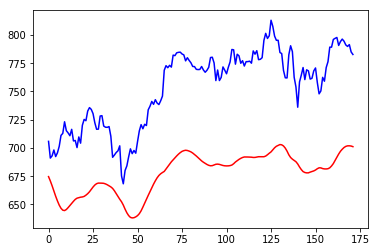

In [36]:
plt.plot(newp,color='red', label='Prediction')
plt.plot(newy_test,color='blue', label='Actual')
plt.savefig('../graph/google_window44.png')

In [37]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

In [38]:
model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00162 MSE (0.04 RMSE)
Test Score: 0.01710 MSE (0.13 RMSE)


(0.0016213618610717332, 0.017102164887758189)